#### Machine Hack - Sales Forcasting

###### About Data 

Sales forecasting has always been one of the most predominant applications of machine learning. Big companies like Walmart have been employing this technique to achieve steady and enormous growth over decades now. In this challenge, you as a data scientist must use machine learning to help a small grocery store in predicting its future sales and making better business decisions.

Given the daily sales of a grocery shop recorded over a period of almost 2 years, your objective as a data scientist is to build a machine learning model that can forecast the sales for the upcoming 3 months.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import kurtosistest

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings

%matplotlib inline
warnings.simplefilter("ignore")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
#reading the data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [4]:
#checking on the basic
print(train.head(2))
print("*"*50)
print(train.isnull().sum())
print("*"*50)
print("The shape of Train Dataset is:",train.shape)

   Day  GrocerySales
0    1       8418.59
1    2       8447.47
**************************************************
Day             0
GrocerySales    0
dtype: int64
**************************************************
The shape of Train Dataset is: (692, 2)


In [5]:
train.describe()

,Day,GrocerySales
count,692.000000,692.000000
mean,346.500000,8564.733471
std,199.907479,428.815668
min,1.000000,6766.370000
25%,173.750000,8411.536858
50%,346.500000,8677.770000
75%,519.250000,8852.387500
max,692.000000,9290.020000


### Pre-processing and Cleansing the Data

In [6]:
#checking normality of data
k2, p = stats.normaltest(train['GrocerySales'])
alpha = 1e-3
print("p = {:g}".format(p))
p = 3.27207e-11
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Data Not Normalize")
else:
    print("Data Noramlize")

p = 3.705e-33
Data Not Normalize


In [7]:
#correlation comparison 
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Day,GrocerySales
Day,1.000000,0.499172
GrocerySales,0.499172,1.000000


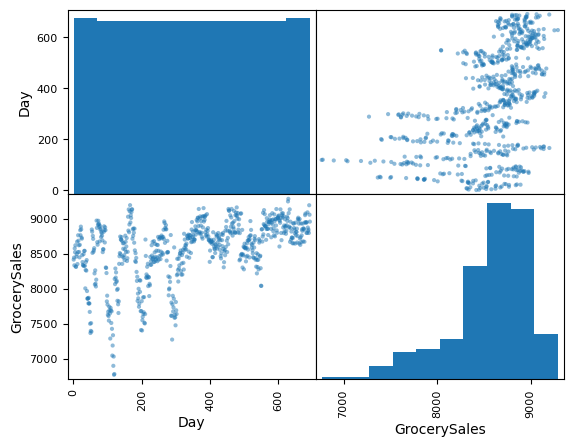

In [8]:
#scatter matrix
scatter_matrix(train)
plt.show()

<Axes: xlabel='variable', ylabel='value'>

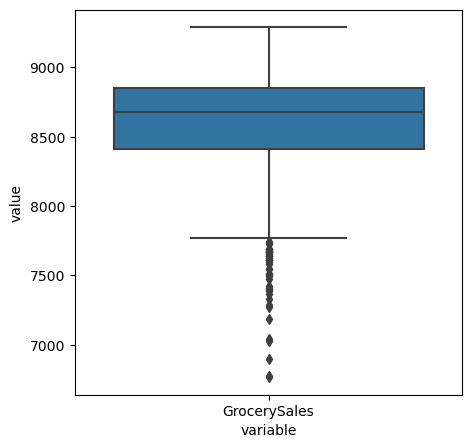

In [9]:
#checking on outliers
plt.figure(figsize=(5,5))
sns.boxplot(x= 'variable', y = 'value', data = pd.melt(train[['GrocerySales']]))

In [10]:
#treemap
fig = px.treemap(train, path=['GrocerySales'],color='GrocerySales', hover_data=['Day', 'GrocerySales'])
fig.show()

In [11]:
#scatter plot
fig = px.scatter(train, x="Day", y="GrocerySales", trendline="ols")
fig.show()

<Axes: xlabel='GrocerySales', ylabel='Density'>

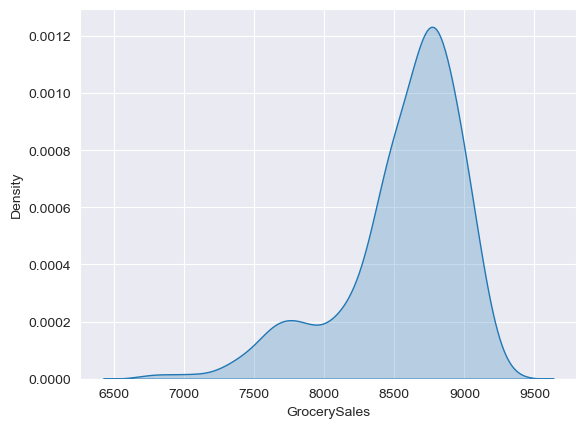

In [12]:
#Grocery Sales density plot 
sns.set_style("darkgrid")
sns.kdeplot(data=train['GrocerySales'],label="GrocerySales" ,shade=True)

### Model Implementation 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
X = train['Day']
y = train['GrocerySales']
X_pred = test['Day']

In [15]:
X = np.array(X)
X = X.reshape(-1, 1)

In [16]:
X_pred = np.array(X_pred)
X_pred = X_pred.reshape(-1, 1)

In [17]:
#scaling the data
rs = RobustScaler()

In [18]:
X_scaled = rs.fit_transform(X)
X_pred_scaled = rs.fit_transform(X_pred)

In [19]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.3,random_state = 42)

#### Using Linear Regression (Non-Scaled Data)

In [20]:
lr = LinearRegression()
lr.fit(train_X,train_y)

LinearRegression()

In [21]:
predict = lr.predict(test_X)
print('Mean Squared Error: %.2f'% mean_squared_error(test_y,predict))
print('Mean Absolute Error: %.2f'% mean_absolute_error(test_y,predict))

Mean Squared Error: 142343.84
Mean Absolute Error: 290.98


In [22]:
y_pred_lr = lr.predict(X_pred)

In [23]:
y_pred_lr

array([8933.06445678, 8934.16263794, 8935.2608191 , 8936.35900026,
       8937.45718142, 8938.55536258, 8939.65354374, 8940.75172491,
       8941.84990607, 8942.94808723, 8944.04626839, 8945.14444955,
       8946.24263071, 8947.34081187, 8948.43899304, 8949.5371742 ,
       8950.63535536, 8951.73353652, 8952.83171768, 8953.92989884,
       8955.02808   , 8956.12626117, 8957.22444233, 8958.32262349,
       8959.42080465, 8960.51898581, 8961.61716697, 8962.71534813,
       8963.8135293 , 8964.91171046, 8966.00989162, 8967.10807278,
       8968.20625394, 8969.3044351 , 8970.40261626, 8971.50079743,
       8972.59897859, 8973.69715975, 8974.79534091, 8975.89352207,
       8976.99170323, 8978.08988439, 8979.18806556, 8980.28624672,
       8981.38442788, 8982.48260904, 8983.5807902 , 8984.67897136,
       8985.77715252, 8986.87533369, 8987.97351485, 8989.07169601,
       8990.16987717, 8991.26805833, 8992.36623949, 8993.46442065,
       8994.56260182, 8995.66078298, 8996.75896414, 8997.85714

#### Using KNN Regressor (Non-Scaled Data)

In [24]:
knn = KNeighborsRegressor()
knn.fit(train_X,train_y)

KNeighborsRegressor()

In [25]:
predict_knn = knn.predict(test_X)
print('Mean Squared Error: %.2f'% mean_squared_error(test_y,predict_knn))
print('Mean Absolute Error: %.2f'% mean_absolute_error(test_y,predict_knn))

Mean Squared Error: 44141.99
Mean Absolute Error: 155.67


In [26]:
y_pred_knn = knn.predict(X_pred)

In [27]:
y_pred_knn

array([8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.078,
       8993.078, 8993.078, 8993.078, 8993.078, 8993.078, 8993.

#### Using Linear Regression (Scaled Data)

In [28]:
scaled_train_X, scaled_test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3,random_state = 42)

In [29]:
lr = LinearRegression()
lr.fit(scaled_train_X,train_y)

LinearRegression()

In [30]:
scaled_predict = lr.predict(scaled_test_X)
print('Mean Squared Error: %.2f'% mean_squared_error(test_y,scaled_predict))
print('Mean Absolute Error: %.2f'% mean_absolute_error(test_y,scaled_predict))

Mean Squared Error: 142343.84
Mean Absolute Error: 290.98


In [31]:
y_pred_scaled_lr = lr.predict(X_pred_scaled)

In [32]:
y_pred_scaled_lr

array([8173.12309306, 8181.64942096, 8190.17574885, 8198.70207674,
       8207.22840464, 8215.75473253, 8224.28106043, 8232.80738832,
       8241.33371621, 8249.86004411, 8258.386372  , 8266.91269989,
       8275.43902779, 8283.96535568, 8292.49168358, 8301.01801147,
       8309.54433936, 8318.07066726, 8326.59699515, 8335.12332305,
       8343.64965094, 8352.17597883, 8360.70230673, 8369.22863462,
       8377.75496251, 8386.28129041, 8394.8076183 , 8403.3339462 ,
       8411.86027409, 8420.38660198, 8428.91292988, 8437.43925777,
       8445.96558567, 8454.49191356, 8463.01824145, 8471.54456935,
       8480.07089724, 8488.59722513, 8497.12355303, 8505.64988092,
       8514.17620882, 8522.70253671, 8531.2288646 , 8539.7551925 ,
       8548.28152039, 8556.80784829, 8565.33417618, 8573.86050407,
       8582.38683197, 8590.91315986, 8599.43948775, 8607.96581565,
       8616.49214354, 8625.01847144, 8633.54479933, 8642.07112722,
       8650.59745512, 8659.12378301, 8667.65011091, 8676.17643

#### Using KNN Regressor (Scaled Data)

In [33]:
knn = KNeighborsRegressor()
knn.fit(scaled_train_X,train_y)

KNeighborsRegressor()

In [34]:
scaled_predict_knn = knn.predict(scaled_test_X)
print('Mean Squared Error: %.2f'% mean_squared_error(test_y,scaled_predict_knn))
print('Mean Absolute Error: %.2f'% mean_absolute_error(test_y,scaled_predict_knn))

Mean Squared Error: 44605.15
Mean Absolute Error: 156.28


In [35]:
y_pred_scaled_knn = knn.predict(X_pred_scaled)

In [36]:
y_pred_scaled_knn

array([8518.608    , 8526.612    , 8611.772    , 8668.474    ,
       8298.726    , 8237.554    , 7628.532    , 8176.144    ,
       8439.724    , 8918.778    , 8837.138    , 8672.836    ,
       8466.824    , 7690.842    , 7545.258    , 7015.656    ,
       8179.342    , 8011.094    , 8590.192    , 8567.763433 ,
       8529.015433 , 8953.7      , 8989.816    , 8582.796    ,
       8057.196    , 7857.074    , 7617.582    , 7878.398    ,
       8150.46     , 8378.23     , 8414.852    , 8492.883433 ,
       8592.127433 , 8630.625433 , 8798.1229732, 8674.8254866,
       8033.078    , 7615.37     , 7648.06     , 8048.068    ,
       8432.54     , 8396.564    , 8566.342    , 8645.814    ,
       8724.856    , 8725.82     , 8786.362    , 8978.532    ,
       8902.206    , 8994.868    , 8883.968    , 8735.0134866,
       8592.85     , 8650.312    , 8674.632    , 8653.226    ,
       8649.224    , 8582.504    , 8806.968    , 8877.59     ,
       8938.728    , 8962.176    , 8842.9894866, 8594.6

### Plottting the Prediction

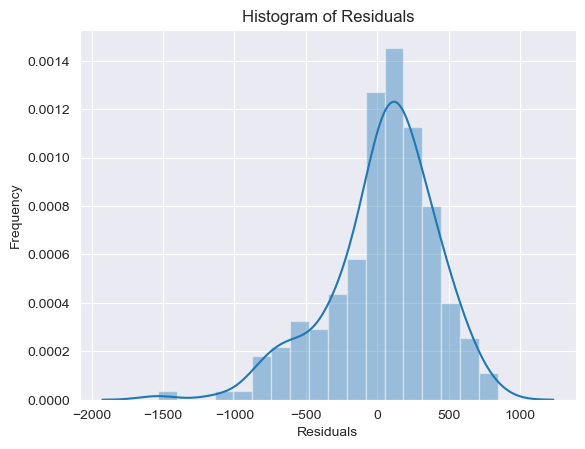

In [37]:
sns.distplot(test_y-predict)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

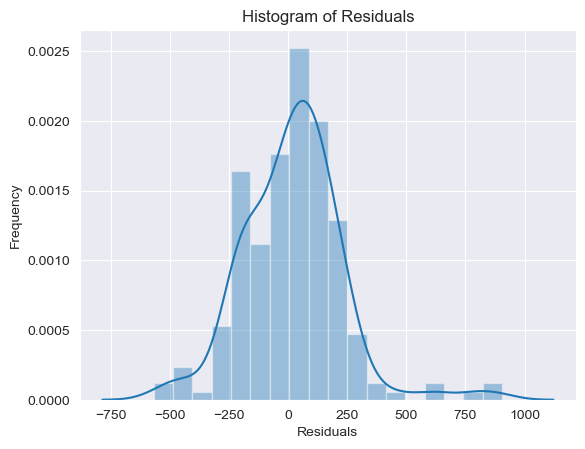

In [38]:
sns.distplot(test_y-predict_knn)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

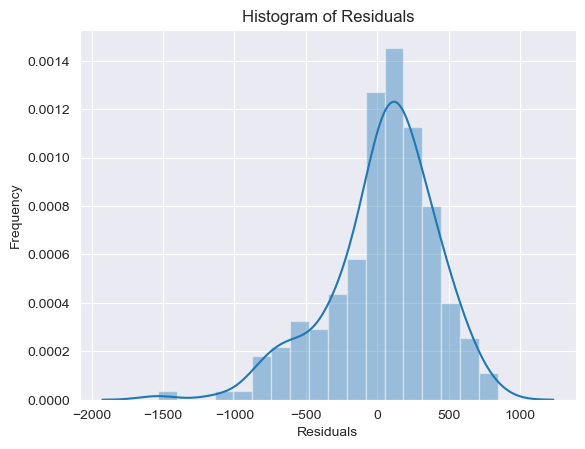

In [39]:
sns.distplot(test_y-scaled_predict)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

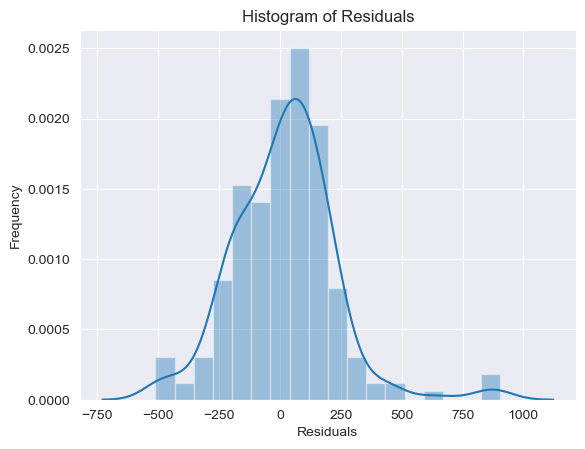

In [40]:
sns.distplot(test_y-scaled_predict_knn)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [41]:
df1 = pd.DataFrame(y_pred_lr,columns=['GrocerySales_lr'])
df2 = pd.DataFrame(y_pred_knn,columns=['GrocerySales_knn'])
df3 = pd.DataFrame(y_pred_scaled_lr,columns=['GrocerySales_lrs'])
df4 = pd.DataFrame(y_pred_scaled_knn,columns=['GrocerySales_knns'])

In [42]:
temp = [test, df1, df2, df3, df4]

In [43]:
test_result = pd.concat(temp, axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)

In [44]:
test_result.head(2)

,Day,GrocerySales_lr,GrocerySales_knn,GrocerySales_lrs,GrocerySales_knns
0,693,8933.064457,8993.078,8173.123093,8518.608
1,694,8934.162638,8993.078,8181.649421,8526.612


In [46]:
fig = px.scatter(x=test_result.Day, y=test_result.GrocerySales_knn)
fig.show()

In [47]:
fig = px.scatter(x=test_result.Day, y=test_result.GrocerySales_knns)
fig.show()

In [48]:
fig = px.scatter(x=test_result.Day, y=test_result.GrocerySales_lr)
fig.show()

In [49]:
fig = px.scatter(x=test_result.Day, y=test_result.GrocerySales_lrs)
fig.show()

### The End!!!